In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("submissions-1527.csv")

In [3]:
df.columns.tolist()

['Submitter',
 'Submitter Email',
 'Submission Date',
 'PyHEP feedback: Atlantic: 15:00 CET, 06:00 PDT, 18:30 IST, 22:00 JST',
 'PyHEP feedback: Pacific: 00:00 CET, 15:00 PDT, 03:30 IST, 07:00 JST',
 'PyHEP feedback: Indian Ocean: 09:00 CET, 00:00 PDT, 12:30 IST, 16:00 JST',
 'PyHEP feedback: In what country do you currently reside?',
 'PyHEP feedback: How did you hear about this workshop?',
 'PyHEP feedback: Do you want to clarify how you found out about this workshop?',
 'PyHEP feedback: What are you hoping to learn from this workshop?',
 'PyHEP feedback: Do you want to clarify what you are hoping to learn from this workshop?',
 'Personal demographics: What best describes your gender?',
 'Personal demographics: What is your country of origin?',
 'Personal demographics: If you like, you may describe your race or ethnicity here.',
 'Professional life: What best describes your occupation?',
 'Professional life: Do you want to clarify your occupation?',
 'Professional life: What best des

In [4]:
len(df['Computing and programming: What are your main reasons for using Python?'])

405

In [5]:
np.count_nonzero(df['Computing and programming: What are your main reasons for using Python?'].str.split("; ").map(lambda x: len([] if not isinstance(x, list) else x)))

397

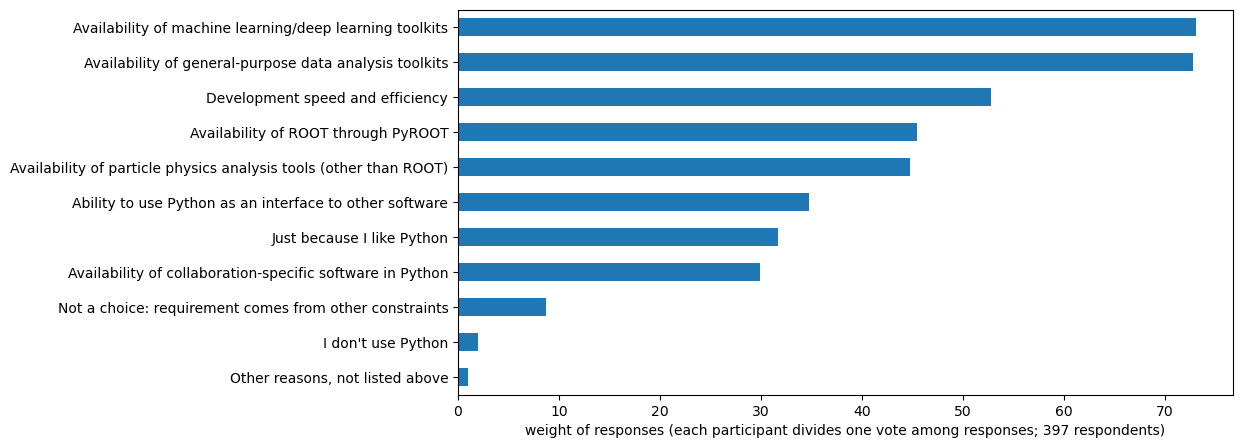

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

pd.DataFrame(df['Computing and programming: What are your main reasons for using Python?'].str.split("; ").map(
    lambda responses: [] if not isinstance(responses, list) else [(x, 1/len(responses)) for x in responses]
).explode().tolist(), columns=("response", "weight")).groupby("response").sum().sort_values("weight").plot.barh(ax=ax)

ax.set_ylabel(None)
ax.set_xlabel("weight of responses (each participant divides one vote among responses; 397 respondents)")
ax.get_legend().remove()
fig.savefig("pyhep2020-why-use-python.svg")
fig.savefig("pyhep2020-why-use-python.pdf")